# Artificial Neural Network (ANN)

---

We'll be classifying MNIST data, which is a set of ~70,000 images of handwritten digits.

---

---
## Pre-processing

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)
#print(type(mnist.train.images))

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


---

## Building an ANN from Sratch

We're going to build an Artificial Neural Network (ANN) from the ground-up, using raw Python, NumPy, and ScipPy.


### Importing Dependencies.

In [3]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


**Dataset visualization**

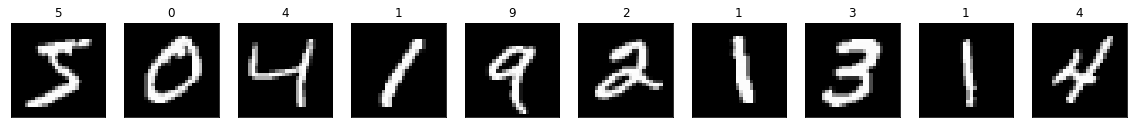

In [4]:
# Plot the training images
fig = plt.figure(figsize=(20,20))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

**How the computer views the image**

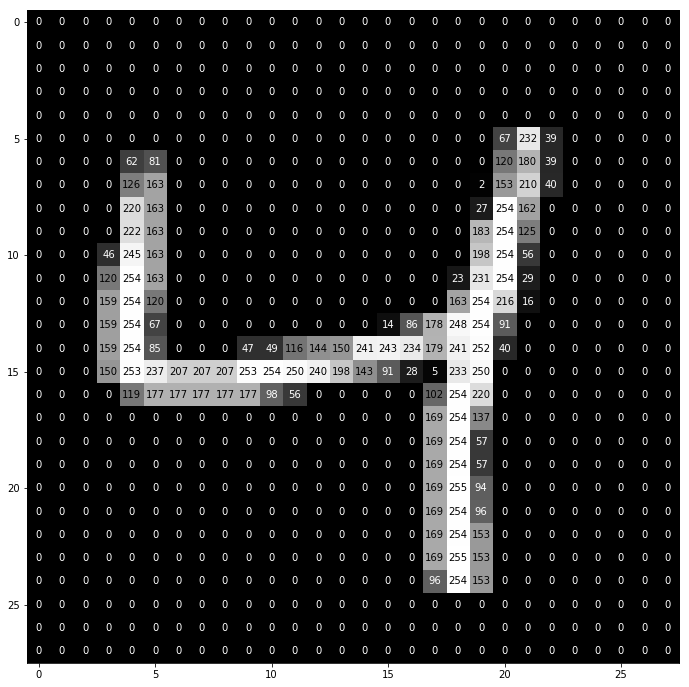

In [5]:
def visualize_input(img, ax):
    """
    Function to show image matrix.
    """
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[2], ax)

We're going to build a ANN class, called `NeuralNetwork`, this will contain two functions, and an initializer.

The functions are: `train(...)` and `query(...)`.

### Building the Initializer: `__init__(...)`

The `__init__(...)` is like a constructor. Essentially, we use this to setup some instance variables that enable us to avoid passing the ANN's configuration to each function we call.

This function has the underlying variables that keep track of and add to the class:
- the number of input nodes
- the number of hidden nodes
- the number of output nodes
- the learning rate
- the weights from the input to hidden layers
- the weights from the hidden to output layers
- the activation function

In [6]:
def __init__(self, n_inodes, n_hnodes, n_onodes, learn_rate):
    # these determine numbers node per layer
    self.i_cnt = n_inodes
    self.h_cnt = n_hnodes
    self.o_cnt = n_onodes
    
    # specify the learning rate
    self.lr = learn_rate
    
    self.v_i2h = np.random.rand(self.h_cnt, self.i_cnt) - 0.5
    self.v_h20 = np.random.rand(self.o_cnt, self.h_cnt) - 0.5
    
    self.v_i2h = np.random.normal(0, pow(self.h_cnt, -0.5), (self.h_cnt, self.i_cnt))
    self.v_i2h = np.random.normal(0, pow(self.o_cnt, -0.5), (self.o_cnt, self.h_cnt))
    
    self.activation = lambda x: expit(x)

### Building the Query Function: `query(...)`

In [7]:
def query(self, input_list):
    
    input = np.array(input_list, ndmin=2).T
    
    hidden_in = np.dot(self.v_i2h, inputs)
    hidden_out = self.activation(hidden_in)
    
    output_in = np.dot(self.v_h2o, hidden_out)
    output_out = self.activation(output_in)
    
    return output_out

### Building the Train Function: `train(...)`

The `train(...)` function is how the ANN learns. It is given the dataset with the labels as input for it to validate itself on by completing forward passes and updating the weights through backprop.

Following are the inputs to this function:
- our inputs
- our expected values

In [8]:
def train(self, input_list, target_list):
    
    inputs = np.array(input_list, ndim=2).T
    targets = np.array(targets_list, ndim=2).T
    
    hidden_in = np.dot(self.v_i2h, inputs)
    hidden_out = self.activation(hidden_in)
    
    output_in = np.dot(self.v_h2o, hidden_out)
    output_out = self.activation(output_in)
    
    # Backward prop.
    
    output_err = targets - output_out
    
    hidden_err = np.dot(self.v_h2o, output_err)
    
    self.v_h2o += self.lr * np.dot((output_err * output_out *(1 - output_out)), hidden_out.T)
    self.v_i2h += self.lr * np.dot((hidden_err * hidden_out *(1 - hidden_out)), inputs.T)

### Assembling the `NeuralNetwork` Class

In [9]:
class NeuralNetwork():

    def __init__(self, n_inodes, n_hnodes, n_onodes, learn_rate):
        # these determine numbers node per layer
        self.i_cnt = n_inodes
        self.h_cnt = n_hnodes
        self.o_cnt = n_onodes

        # specify the learning rate
        self.lr = learn_rate

        self.v_i2h = np.random.rand(self.h_cnt, self.i_cnt) - 0.5
        self.v_h20 = np.random.rand(self.o_cnt, self.h_cnt) - 0.5

        self.v_i2h = np.random.normal(0, pow(self.h_cnt, -0.5), (self.h_cnt, self.i_cnt))
        self.v_h2o = np.random.normal(0, pow(self.o_cnt, -0.5), (self.o_cnt, self.h_cnt))

        self.activation = lambda x: expit(x)

    def train(self, input_list, targets_list):

        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_in = np.dot(self.v_i2h, inputs)
        hidden_out = self.activation(hidden_in)

        output_in = np.dot(self.v_h2o, hidden_out)
        output_out = self.activation(output_in)

        # Backward prop.

        output_err = targets - output_out

        hidden_err = np.dot(self.v_h2o.T, output_err)

        self.v_h2o += self.lr * np.dot((output_err * output_out *(1 - output_out)), hidden_out.T)
        self.v_i2h += self.lr * np.dot((hidden_err * hidden_out *(1 - hidden_out)), inputs.T)

    def query(self, input_list):

        input = np.array(input_list, ndmin=2).T

        hidden_in = np.dot(self.v_i2h, inputs)
        hidden_out = self.activation(hidden_in)

        output_in = np.dot(self.v_h2o, hidden_out)
        output_out = self.activation(output_in)

        return output_out

### Training the Network on MNIST
The images are `28x28` pixel images, which results in a total of `784` inputs. We need to classify these images into `10` classes, as we're analyzing the numbers `0-9`. The hidden layers is rather arbitrary in size, so we can use any number of hidden layers.

In [10]:
n_inodes = 784
n_hnodes = 77
n_onodes = 10

learn_rt = 0.2

nn = NeuralNetwork(n_inodes, n_hnodes, n_onodes, learn_rt)

We've initialized the ANN, so now we need to actually execute the training of it. We'll train over `N` *epochs*, which are essentially just the number of times we go over the data to see if we can continue to refine the weights.

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

epochs = 25

for e in range(epochs):
    for record, label in zip(mnist.train.images, mnist.train.labels):
        record[record == float(0)] = 0.01
        label[label == float(0)] = 0.01
        nn.train(record, label)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


### Scoring the Network

We've built and trained the ANN, now; so the next step we should take is to test our accuracy to see if our model has actually learned, well, from the data we've given it.

In [13]:
score = []

for record, label in zip(mnist.test.images, mnist.test.labels):
    correct_label = np.argmax(label)
    inputs = record * 0.99 + 0.01

    outputs = nn.query(inputs)
    label = np.argmax(outputs)
    
    score.append(1 if label == correct_label else 0)

In [14]:
print("Performance = {0:.3f}%".format(np.array(score).mean() * 100))

Performance = 94.890%


## Rebuilding the ANN in TensorFlow

Building the same sort of ANN, in TensorFlow.

In [15]:
import tensorflow as tf

In [16]:
x = tf.placeholder(tf.float32, [None, 784])

In [17]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Softmax is one of many different activation functions. Softmax is defined as:

We use softmax because our ultimate goal is to assign probabilities to our input that it belongs to one of the 10 classes of numbers. It will give us a list of results from \[0, 1\] which all sum to 1, as well.

One of the reasons for using softmax is that it allows us to assign probabilities between 0 and 1 for a collection of data that we want. So, if we had 4 outputs to choose from, softmax could give an output like \[0.1, 0.2, 0.4, 0.3\] and our classifier would choose whatever class 2 (CS#2) represents.

Softmax is composed of two steps:
1. Add up all the evidence that our input belongs to a specific class.
2. Cover that evidence into a probability.

$$softmax(x) = normalize(exp(x)) = \frac{exp(x_i)}{\sum_{j} exp(x_i)}$$

In [18]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [19]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [20]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [21]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [22]:
sess = tf.InteractiveSession()

In [23]:
tf.global_variables_initializer().run()

In [24]:
for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    #y = labels and x are the features

In [25]:
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

We've rebuilt an equivalent ANN in TensorFlow. This network's accuracy is about 91%.

In [27]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("Performance = {0:.3f}%".format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100))

Performance = 91.530%
